In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增
import seaborn as sns

7 7 (7, 7)


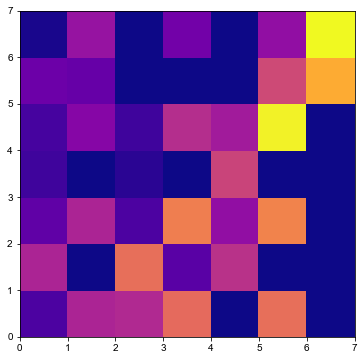

In [23]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
print(len(vegetables), len(farmers),harvest.shape)
# plot
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
# ax.imshow(harvest,interpolation='bilinear')
ax.pcolor(harvest,cmap='plasma')
# ax.pcolormesh(harvest)
plt.savefig('test.pdf',dpi=400)
plt.show()

0.0 6.3
7 0 6
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


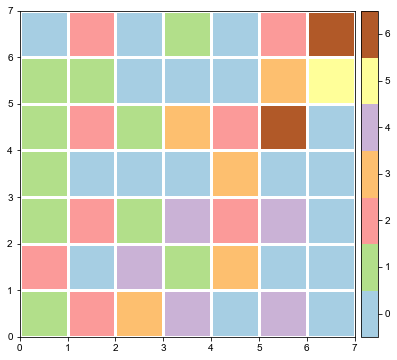

In [46]:
data=harvest
print(data.min(),data.max())
# 
minlevel,maxlevel=int(np.min(data)),int(np.max(data))
nlevel=int(maxlevel-minlevel)+1
print(nlevel,minlevel,maxlevel)
cdata=np.linspace(minlevel-0.5,maxlevel+0.5, nlevel+1)
norm=mpl.colors.BoundaryNorm(cdata,nlevel)
print(cdata)
# plot
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
# ax.imshow(harvest,interpolation='bilinear')
im=ax.pcolor(data,cmap=plt.get_cmap('Paired',nlevel),norm=norm)
ax_cb=ax.inset_axes([1.02, 0, 0.05, 1], transform=ax.transAxes)
plt.colorbar(im,cax=ax_cb,ticks=cdata+0.5)

ax.grid(which='major',color='w',lw=3)
# ax.pcolormesh(harvest)
plt.show()

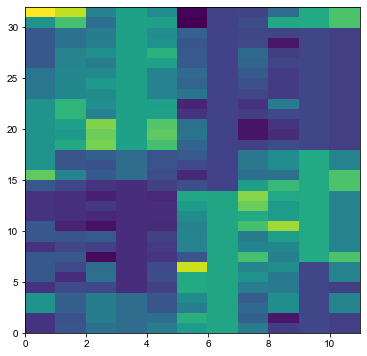

In [69]:
data_cars=pd.read_csv('Data/mtcars/mtcars.csv')
df=data_cars.set_index('model')

del df.index.name

data=df.values

clustermap=sns.clustermap(df, z_score=1)
plt.close()
clusterdata=clustermap.data2d

# plot
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.pcolor(data/data.max(axis=0))
ax.pcolor(clusterdata.values)